In [97]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier

# import function to perform feature selection
from sklearn.feature_selection import RFE



plt.rcParams['figure.figsize'] = [15,8]

In [98]:
train  = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [99]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.000000,31397,7.000000,Emergency,Extreme,2,51-60,4911.000000,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,5954.000000,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,4745.000000,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,7272.000000,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.000000,31397,7.000000,Trauma,Extreme,2,51-60,5558.000000,41-50


In [100]:
print(train.shape)
print(test.shape)

(318438, 18)
(137057, 17)


In [101]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [102]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

### Check Duplicates

In [103]:
train.duplicated().sum()

0

### Change Data Types

##### For Train Data

In [104]:
train['Hospital_code'] = train['Hospital_code'].astype(object)
train['City_Code_Hospital'] = train['City_Code_Hospital'].astype(object)
train['Available Extra Rooms in Hospital'] = train['Available Extra Rooms in Hospital'].astype(object)
train['Bed Grade'] = train['Bed Grade'].astype(object)
train['City_Code_Patient'] = train['City_Code_Patient'].astype(object)

In [105]:
train.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital     object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

##### For Test Data

In [106]:
test['Hospital_code'] = test['Hospital_code'].astype(object)
test['City_Code_Hospital'] = test['City_Code_Hospital'].astype(object)
test['Available Extra Rooms in Hospital'] = test['Available Extra Rooms in Hospital'].astype(object)
test['Bed Grade'] = test['Bed Grade'].astype(object)
test['City_Code_Patient'] = test['City_Code_Patient'].astype(object)

In [107]:
test.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital     object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object

### Remove Insignificant Variables

In [108]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [109]:
test.drop(['case_id', 'patientid'], axis=1, inplace=True)

### Data Modifications

#### i) Stay

In [110]:
train['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

### Distribution of numeric independent variables

<Figure size 1080x576 with 0 Axes>

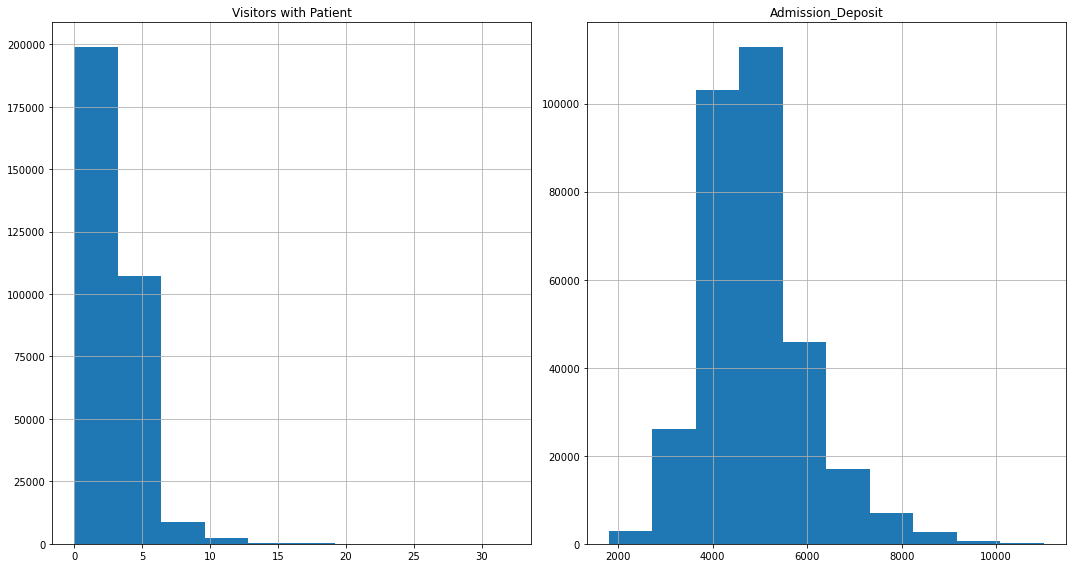

Skewness:


Hospital_code                       -0.280783
City_Code_Hospital                   0.538809
Available Extra Rooms in Hospital    0.971930
Bed Grade                            0.051754
City_Code_Patient                    1.581736
Visitors with Patient                3.137125
Admission_Deposit                    0.931454
dtype: float64

In [111]:
plt.figure(figsize=(15,8))

train.drop('Stay', axis = 1).hist()
plt.tight_layout()
plt.show()  

print('Skewness:')
train.drop('Stay', axis = 1).skew()

### EDA

#### Univariate Analysis

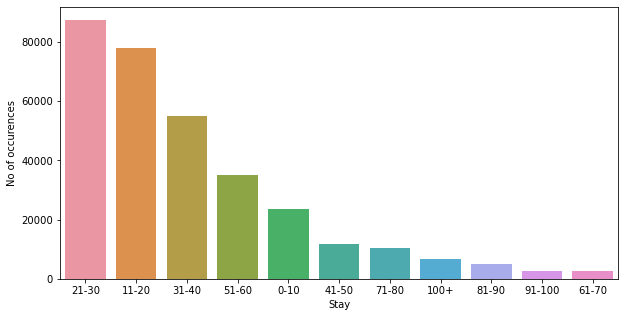

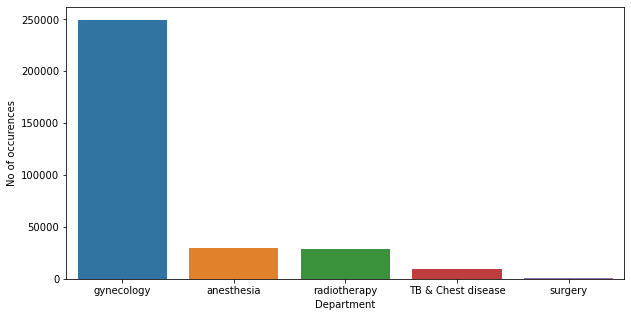

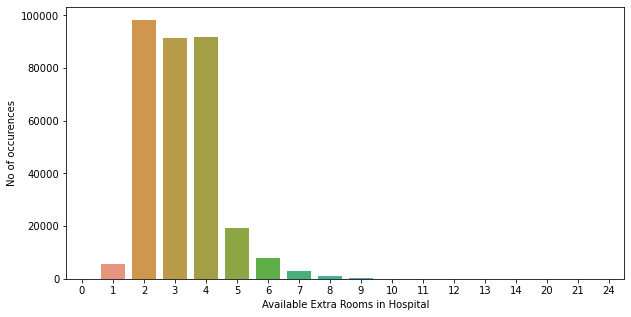

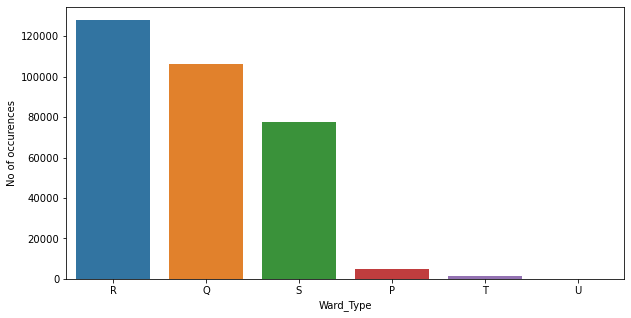

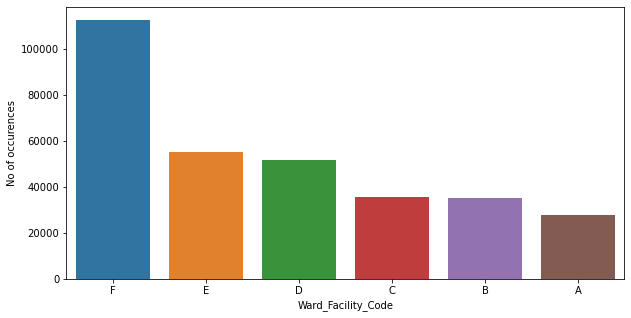

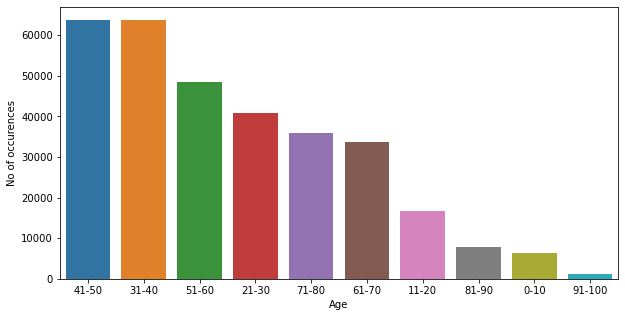

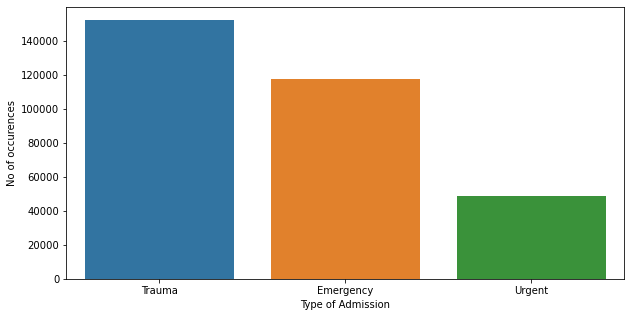

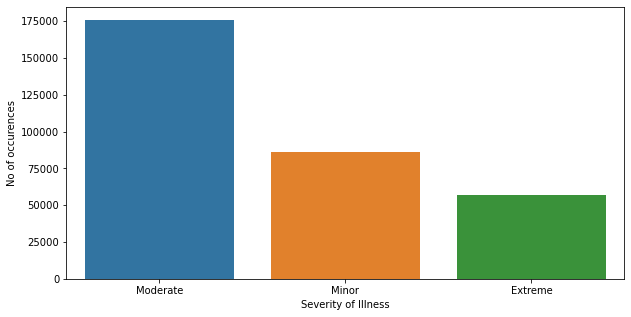

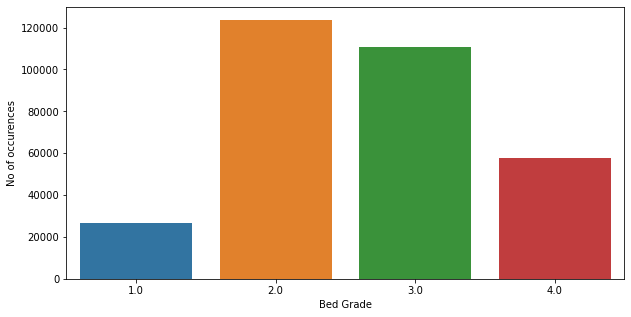

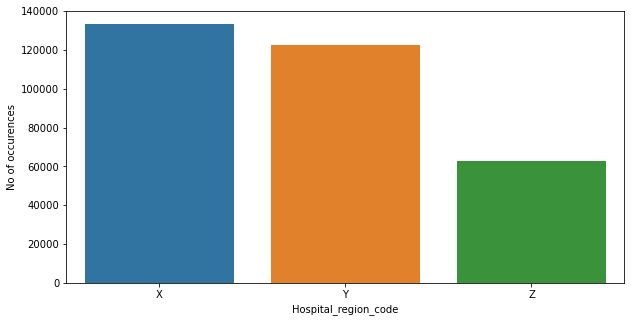

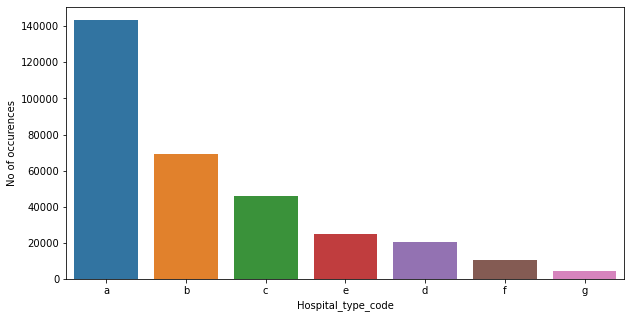

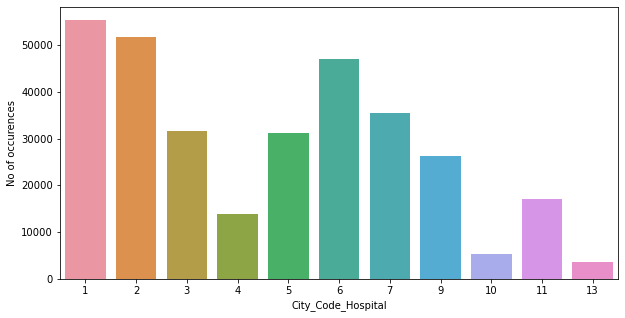

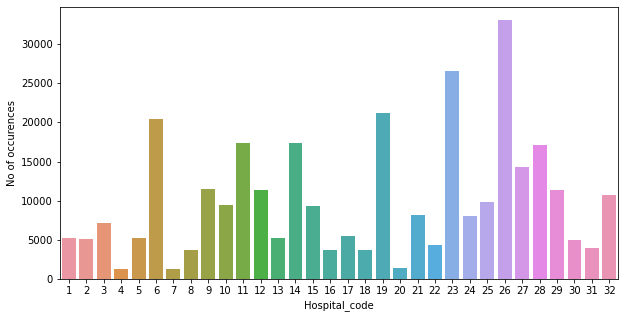

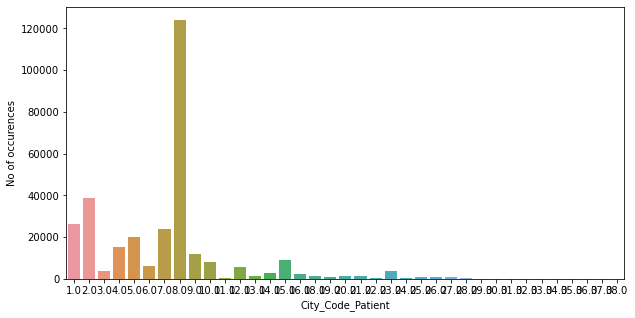

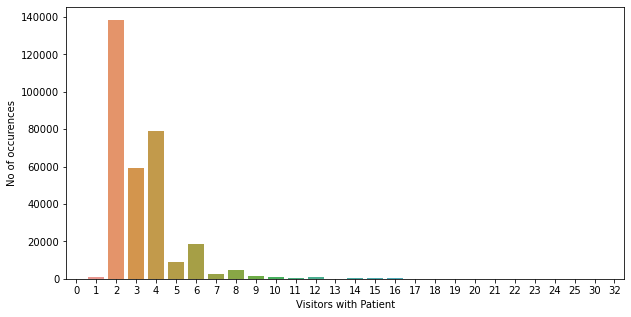

In [112]:
train['Stay'] .replace('More than 100 Days', '>100', inplace=True)

for i in [ 'Stay', 'Department', 'Available Extra Rooms in Hospital', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 
          'Type of Admission', 'Severity of Illness', 'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ,  
          'City_Code_Hospital', 'Hospital_code', 'City_Code_Patient', 'Visitors with Patient']:
            count = train[i].value_counts()

            plt.figure(figsize=(10,5))

            sns.barplot(x=count.index.values, y=count.values,data=train)
            
            plt.xlabel(i)
            plt.ylabel('No of occurences')

#### Bivariate Analysis

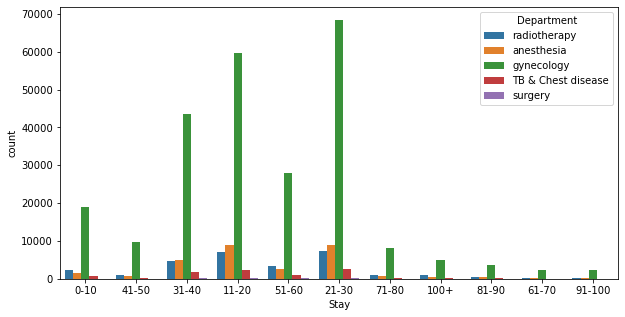

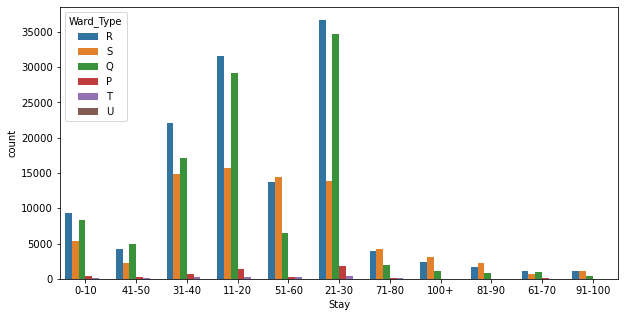

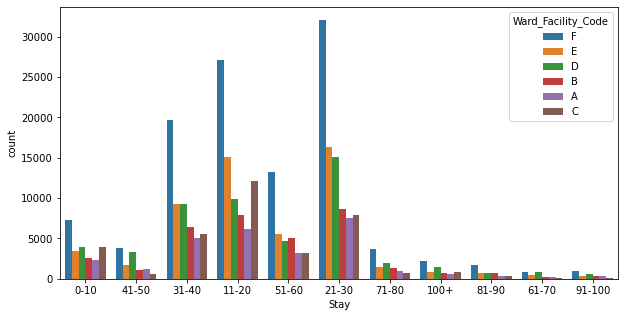

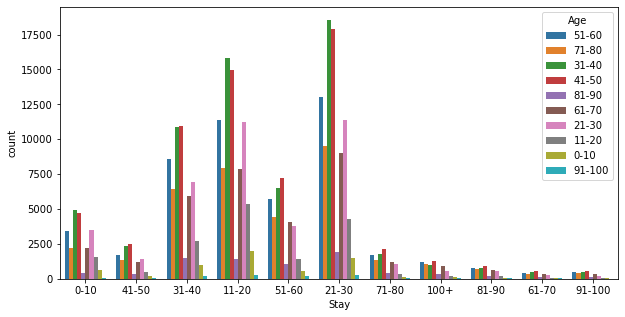

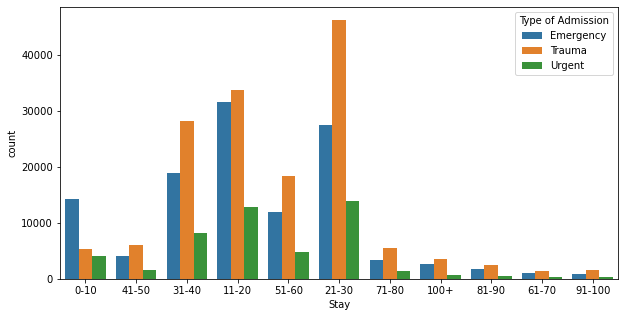

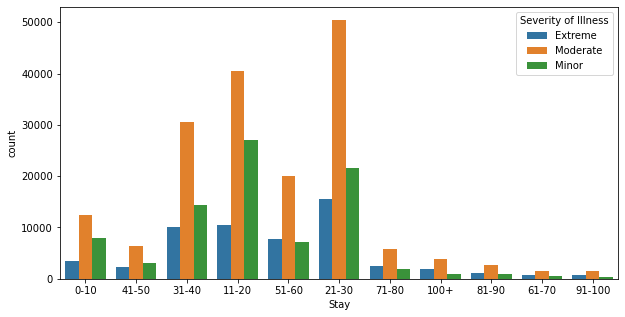

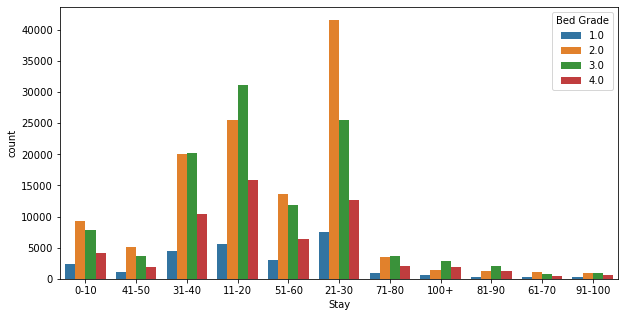

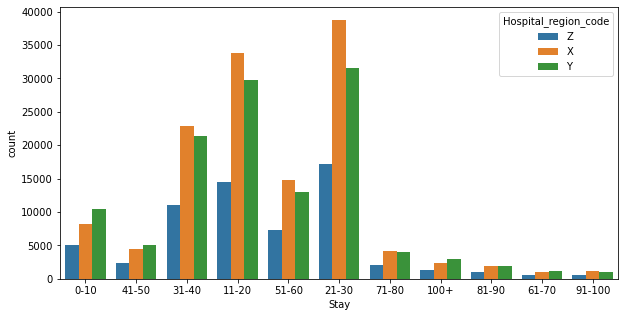

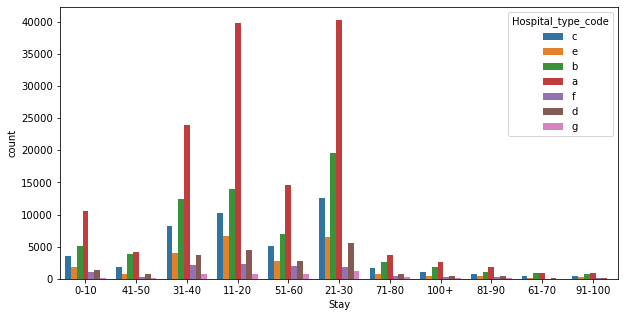

In [113]:
for i in [ 'Department', 'Ward_Type' ,'Ward_Facility_Code', 'Age', 'Type of Admission', 'Severity of Illness', 
          'Bed Grade', 'Hospital_region_code', 'Hospital_type_code' ]:

            plt.figure(figsize=(10,5))

            sns.countplot(x='Stay',hue=i,data=train)

#### Numerical Features

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

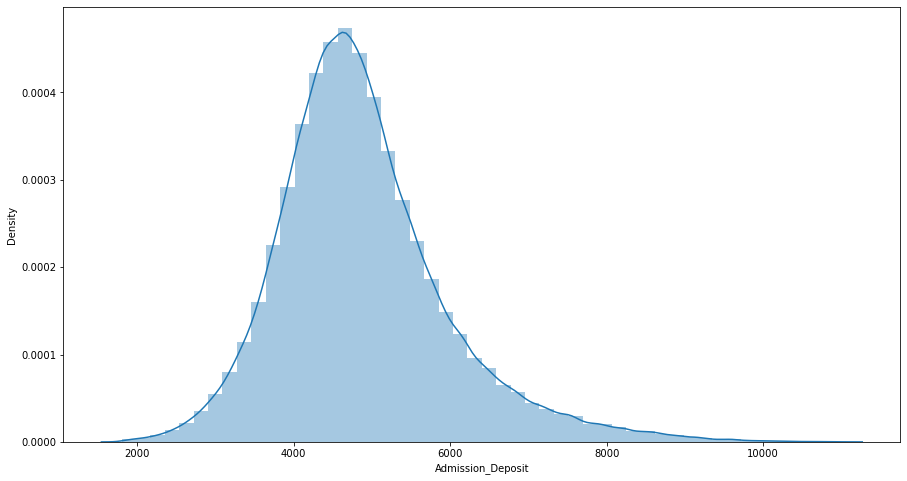

In [114]:
sns.distplot( train['Admission_Deposit'])

#### Missing Value Treatment

##### For Train Data

In [115]:
Total = train.isnull().sum().sort_values(ascending=False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,4532,1.423197
Bed Grade,113,0.035486
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


In [116]:
Total = train.isnull().sum().sort_values(ascending=False)          

Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,4532,1.423197
Bed Grade,113,0.035486
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


##### For Test Data

In [117]:
Total = test.isnull().sum().sort_values(ascending=False)          

Percent = (test.isnull().sum()*100/test.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
City_Code_Patient,2157,1.573798
Bed Grade,35,0.025537
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000


### Drop unwanted columns

In [118]:
train.dropna(subset = ['Bed Grade', 'City_Code_Patient'], inplace = True)

In [119]:
test['Bed Grade'] = test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)
test['City_Code_Patient'] = test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [120]:
df_num_train = train.select_dtypes([np.number])
df_num_train.head()

,Visitors with Patient,Admission_Deposit
0,2,4911.000000
1,2,5954.000000
2,2,4745.000000
3,2,7272.000000
4,2,5558.000000


In [121]:
df_cat_train = train.select_dtypes([np.object])
df_cat_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.000000,7.000000,Emergency,Extreme,51-60,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.000000,7.000000,Trauma,Extreme,51-60,41-50
2,10,e,1,X,2,anesthesia,S,E,2.000000,7.000000,Trauma,Extreme,51-60,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.000000,7.000000,Trauma,Extreme,51-60,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.000000,7.000000,Trauma,Extreme,51-60,41-50


In [122]:
df_num_test = test.select_dtypes([np.number])
df_num_test.head()

,Visitors with Patient,Admission_Deposit
0,2,3095.000000
1,4,4018.000000
2,3,4492.000000
3,3,4173.000000
4,4,4161.000000


In [123]:
df_cat_test = test.select_dtypes([np.object])
df_cat_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,21,c,3,Z,3,gynecology,S,A,None,None,Emergency,Moderate,71-80
1,29,a,4,X,2,gynecology,S,F,None,None,Trauma,Moderate,71-80
2,26,b,2,Y,3,gynecology,Q,D,None,None,Emergency,Moderate,71-80
3,6,a,6,X,3,gynecology,Q,F,None,None,Trauma,Moderate,71-80
4,28,b,11,X,2,gynecology,R,F,None,None,Trauma,Moderate,71-80


### Encoding

##### Ordinal Data

In [124]:
admission_encode  = {'Trauma': 1, 'Urgent': 2, 'Emergency' : 3 }
severity_encode   = {'Minor': 1, 'Moderate': 2, 'Extreme': 3 }


df_cat_train['Type of Admission']  =  df_cat_train['Type of Admission'].map (admission_encode)
df_cat_train['Severity of Illness']  =  df_cat_train['Severity of Illness'].map (severity_encode)

df_cat_test['Type of Admission']  =  df_cat_test['Type of Admission'].map (admission_encode)
df_cat_test['Severity of Illness']  =  df_cat_test['Severity of Illness'].map (severity_encode)

In [125]:
df_cat_train['Stay']= df_cat_train['Stay'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10,'100+':11})

df_cat_train['Age']= df_cat_train['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10})

df_cat_test['Age']= df_cat_test['Age'].replace({'0-10':1, '11-20':2, '21-30':3, '31-40':4, '41-50':5, '51-60':6,'61-70':7,
                                      '71-80':8,'81-90':9,'91-100':10})

In [126]:
df_cat_train['Stay']=df_cat_train['Stay'].astype(int)

##### Nominal Data

##### For Train Data

In [127]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_cat_train['Hospital_code']=LE.fit_transform(df_cat_train['Hospital_code'])
df_cat_train['Hospital_type_code']=LE.fit_transform(df_cat_train['Hospital_type_code'])
df_cat_train['City_Code_Hospital']=LE.fit_transform(df_cat_train['City_Code_Hospital'])
df_cat_train['Hospital_region_code']=LE.fit_transform(df_cat_train['Hospital_region_code'])
df_cat_train['Department']=LE.fit_transform(df_cat_train['Department'])
df_cat_train['Ward_Type']=LE.fit_transform(df_cat_train['Ward_Type'])
df_cat_train['Ward_Facility_Code']=LE.fit_transform(df_cat_train['Ward_Facility_Code'])
df_cat_train['City_Code_Patient']=LE.fit_transform(df_cat_train['City_Code_Patient'])
df_cat_train['Bed Grade']=LE.fit_transform(df_cat_train['Bed Grade'])

df_cat_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,7,2,2,2,3,3,2,5,1,6,3,3,6,1
1,1,2,4,2,2,3,3,5,1,6,1,3,6,5
2,9,4,0,0,2,1,3,4,1,6,1,3,6,4
3,25,1,1,1,2,3,2,3,1,6,1,3,6,5
4,25,1,1,1,2,3,3,3,1,6,1,3,6,5


##### For Test Data

In [128]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_cat_test['Hospital_code']=LE.fit_transform(df_cat_test['Hospital_code'])
df_cat_test['Hospital_type_code']=LE.fit_transform(df_cat_test['Hospital_type_code'])
df_cat_test['City_Code_Hospital']=LE.fit_transform(df_cat_test['City_Code_Hospital'])
df_cat_test['Hospital_region_code']=LE.fit_transform(df_cat_test['Hospital_region_code'])
df_cat_test['Department']=LE.fit_transform(df_cat_test['Department'])
df_cat_test['Ward_Type']=LE.fit_transform(df_cat_test['Ward_Type'])
df_cat_test['Ward_Facility_Code']=LE.fit_transform(df_cat_test['Ward_Facility_Code'])
df_cat_test['City_Code_Patient']=LE.fit_transform(df_cat_test['City_Code_Patient'])
df_cat_test['Bed Grade']=LE.fit_transform(df_cat_test['Bed Grade'])

df_cat_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,20,2,2,2,3,2,3,0,0,0,3,2,8
1,28,0,3,0,2,2,3,5,0,0,1,2,8
2,25,1,1,1,3,2,1,3,0,0,3,2,8
3,5,0,5,0,3,2,1,5,0,0,1,2,8
4,27,1,9,0,2,2,2,5,0,0,1,2,8


### Transforming the data

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

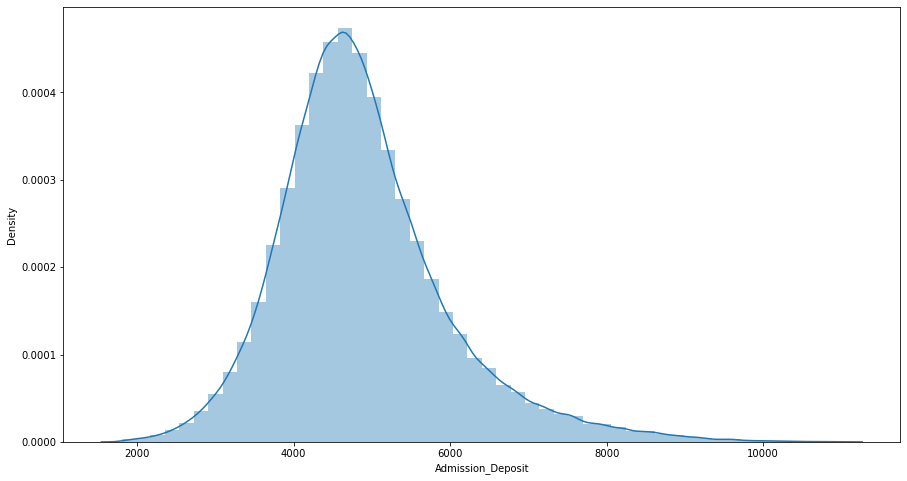

In [129]:
sns.distplot(df_num_train['Admission_Deposit'])

In [130]:
df_num_train['Admission_Deposit']=np.log(df_num_train['Admission_Deposit'])

In [131]:
df_num_train['Admission_Deposit'].skew()

0.0293591407297098

### Scale the Data

In [132]:
from sklearn.preprocessing import StandardScaler
# For training Data
sc = StandardScaler()

num_scaled = sc.fit_transform(df_num_train)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num_train.columns)

In [133]:
# For test Data

num_scaled_test = sc.fit_transform(df_num_test)

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = df_num_test.columns)

In [134]:
df_num_scaled.shape

(313793, 2)

In [135]:
df_cat_train = df_cat_train.reset_index(drop=True)

In [136]:
df_num_scaled = df_num_scaled.reset_index(drop=True)

In [137]:
df_cat_test = df_cat_test.reset_index(drop=True)
df_num_scaled_test = df_num_scaled_test.reset_index(drop=True)

In [138]:
df_cat_train.shape

(313793, 14)

In [139]:
df_full = pd.concat([df_num_scaled, df_cat_train],axis=1)
df_full_test =  pd.concat([df_num_scaled_test, df_cat_test],axis=1)

In [140]:
df_full.shape

(313793, 16)

In [141]:
df_full.head()

,Visitors with Patient,Admission_Deposit,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,-0.727035,0.136439,7,2,2,2,3,3,2,5,1,6,3,3,6,1
1,-0.727035,1.024238,1,2,4,2,2,3,3,5,1,6,1,3,6,5
2,-0.727035,-0.022078,9,4,0,0,2,1,3,4,1,6,1,3,6,4
3,-0.727035,1.946069,25,1,1,1,2,3,2,3,1,6,1,3,6,5
4,-0.727035,0.706962,25,1,1,1,2,3,3,3,1,6,1,3,6,5


<AxesSubplot:>

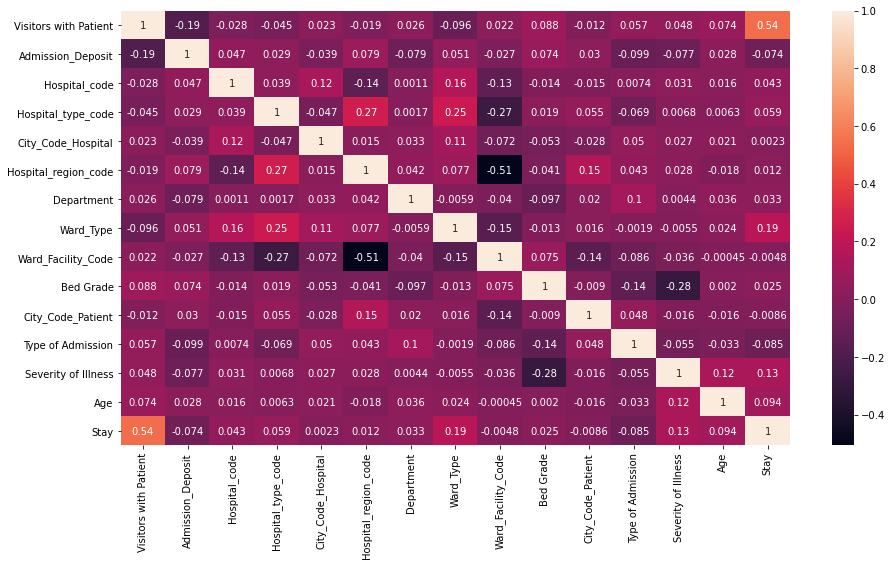

In [142]:
sns.heatmap(df_full.corr(), annot = True)

### Train Test Split

In [180]:
X = df_full.drop('Stay',axis=1)
y = df_full['Stay']

In [181]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (219655, 16)
y_train (219655,)
X_test (94138, 16)
y_test (94138,)


### K Fold Cross Validation

In [182]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10, shuffle=True, random_state=10)   

### Logistic Regression

In [360]:
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)
accuracy_score(y_test,y_pred_LR)*100 

37.936858654316005

In [361]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           1       0.44      0.03      0.06      6901
           2       0.37      0.43      0.40     23205
           3       0.40      0.65      0.50     25792
           4       0.31      0.21      0.25     16289
           5       0.00      0.00      0.00      3439
           6       0.37      0.44      0.40     10470
           7       0.00      0.00      0.00       822
           8       1.00      0.00      0.00      3093
           9       0.15      0.00      0.01      1412
          10       0.00      0.00      0.00       782
          11       0.50      0.31      0.38      1933

    accuracy                           0.38     94138
   macro avg       0.32      0.19      0.18     94138
weighted avg       0.37      0.38      0.34     94138



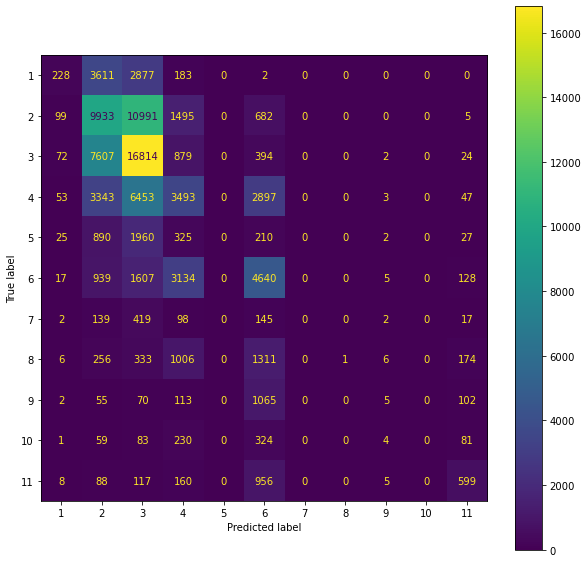

In [367]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(LR, X_test, y_test, ax=ax)

### Decision Tree

In [385]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree_classification =decision_tree_classification.fit(X_train, y_train)

In [386]:
y_pred_DT=decision_tree_classification.predict(X_test)
accuracy_score(y_test,y_pred_DT)*100 

29.684080817523213

In [387]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           1       0.19      0.19      0.19      6901
           2       0.34      0.34      0.34     23205
           3       0.39      0.38      0.38     25792
           4       0.25      0.25      0.25     16289
           5       0.06      0.07      0.07      3439
           6       0.31      0.30      0.31     10470
           7       0.03      0.04      0.03       822
           8       0.15      0.15      0.15      3093
           9       0.22      0.23      0.22      1412
          10       0.08      0.10      0.09       782
          11       0.32      0.35      0.33      1933

    accuracy                           0.30     94138
   macro avg       0.21      0.22      0.21     94138
weighted avg       0.30      0.30      0.30     94138



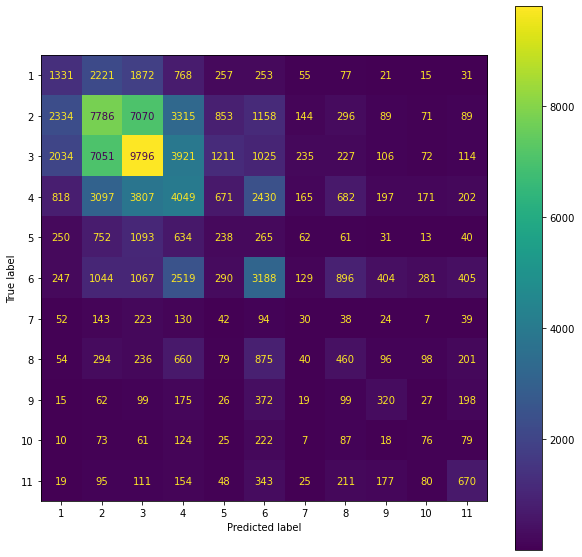

In [388]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(decision_tree_classification, X_test, y_test, ax=ax)

### Tuned HyperParameter Decision Tree

In [105]:
tuned_paramaters = {'max_depth':np.arange(1,100),'criterion' : ['entropy','gini']}  

from sklearn.model_selection import GridSearchCV

tree_grid = GridSearchCV(decision_tree_classification, tuned_paramaters, cv = kfold, scoring = 'f1_weighted')        

tree_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=10),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [106]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [377]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth=11, random_state = 10)

decision_tree_tuned = dt_tuned.fit(X_train, y_train)

In [378]:
y_pred_DT_tuned = decision_tree_tuned.predict(X_test)
accuracy_score(y_test,y_pred_DT_tuned)*100 

40.82304701608277

In [379]:
print(classification_report(y_test,y_pred_DT_tuned))

              precision    recall  f1-score   support

           1       0.36      0.13      0.19      6901
           2       0.41      0.46      0.44     23205
           3       0.41      0.67      0.51     25792
           4       0.39      0.23      0.29     16289
           5       0.07      0.00      0.00      3439
           6       0.41      0.45      0.43     10470
           7       0.00      0.00      0.00       822
           8       0.27      0.03      0.05      3093
           9       0.35      0.21      0.27      1412
          10       0.20      0.03      0.05       782
          11       0.52      0.36      0.43      1933

    accuracy                           0.41     94138
   macro avg       0.31      0.23      0.24     94138
weighted avg       0.38      0.41      0.37     94138



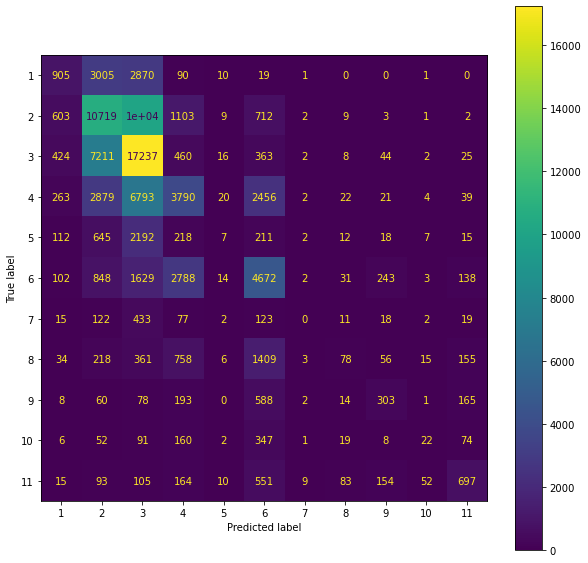

In [380]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(decision_tree_tuned, X_test, y_test, ax=ax)

### Random Forest

In [373]:
rf_classification = RandomForestClassifier(random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [374]:
y_pred_RF = rf_model.predict(X_test)
accuracy_score(y_test,y_pred_RF)*100 

38.32671184856275

In [375]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           1       0.30      0.19      0.23      6901
           2       0.39      0.44      0.42     23205
           3       0.41      0.54      0.47     25792
           4       0.33      0.27      0.29     16289
           5       0.09      0.02      0.04      3439
           6       0.40      0.44      0.42     10470
           7       0.10      0.02      0.03       822
           8       0.28      0.10      0.15      3093
           9       0.37      0.22      0.27      1412
          10       0.24      0.06      0.09       782
          11       0.52      0.44      0.48      1933

    accuracy                           0.38     94138
   macro avg       0.31      0.25      0.26     94138
weighted avg       0.36      0.38      0.37     94138



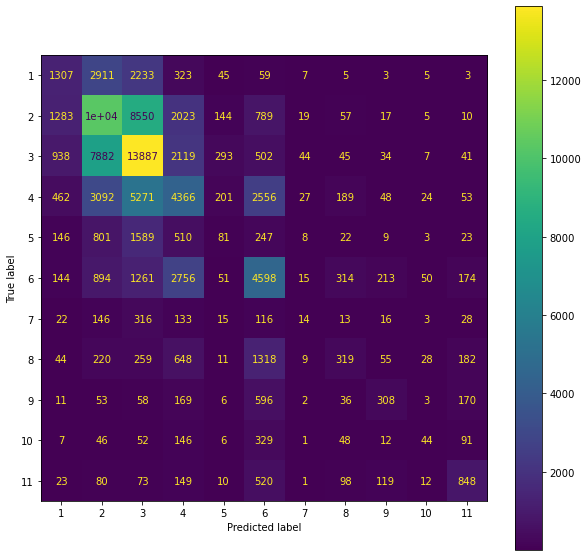

In [376]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf_model, X_test, y_test, ax=ax)

### Tuned HyperParameter Random Forest

In [ ]:
tuned_paramaters = {'n_estimators':np.arange(1,50),'criterion' : ['entropy','gini']}  

from sklearn.model_selection import GridSearchCV

RF_grid = GridSearchCV(rf_classification, tuned_paramaters, cv = kfold)        

RF_grid.fit(X_train,y_train)

In [120]:
RF_grid.best_params_

{'criterion': 'gini', 'n_estimators': 47}

In [389]:
rf_classification_tuned = RandomForestClassifier(criterion = 'gini', n_estimators = 47, random_state = 10)

rf_model_tuned = rf_classification_tuned.fit(X_train, y_train)

In [390]:
y_pred_RF_tuned = rf_model_tuned.predict(X_test)
accuracy_score(y_test,y_pred_RF_tuned)*100 

37.95279270857677

In [391]:
print(classification_report(y_test,y_pred_RF_tuned))

              precision    recall  f1-score   support

           1       0.29      0.19      0.23      6901
           2       0.38      0.44      0.41     23205
           3       0.41      0.53      0.46     25792
           4       0.33      0.27      0.30     16289
           5       0.09      0.02      0.04      3439
           6       0.39      0.43      0.41     10470
           7       0.10      0.02      0.03       822
           8       0.27      0.11      0.15      3093
           9       0.36      0.22      0.27      1412
          10       0.22      0.05      0.08       782
          11       0.52      0.43      0.47      1933

    accuracy                           0.38     94138
   macro avg       0.31      0.25      0.26     94138
weighted avg       0.36      0.38      0.36     94138



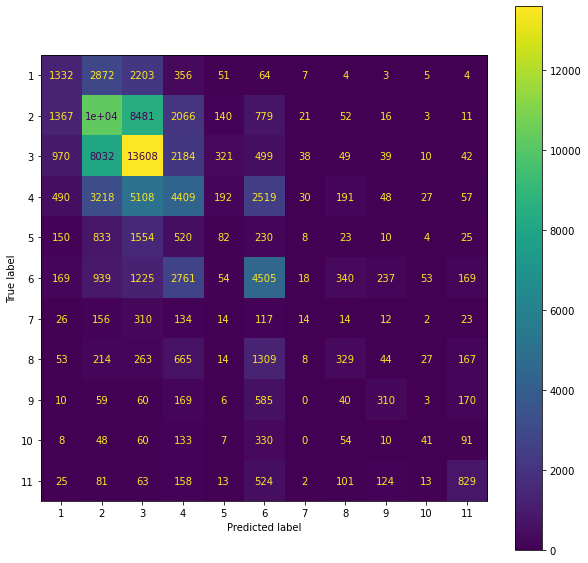

In [392]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf_classification_tuned, X_test, y_test, ax=ax)

### ADA Boost - Decision Tree

In [393]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth=11, random_state = 10)

In [394]:
ada_model_DT = AdaBoostClassifier(base_estimator=dt_tuned, random_state = 10)

ada_model_DT.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,
                                                         random_state=10),
                   random_state=10)

In [395]:
y_pred_ada_model_DT = ada_model_DT.predict(X_test)
accuracy_score(y_test,y_pred_ada_model_DT)*100 

29.924153901718753

In [396]:
print(classification_report(y_test,y_pred_ada_model_DT))

              precision    recall  f1-score   support

           1       0.19      0.16      0.17      6901
           2       0.33      0.34      0.33     23205
           3       0.38      0.39      0.39     25792
           4       0.22      0.27      0.24     16289
           5       0.06      0.04      0.05      3439
           6       0.31      0.36      0.33     10470
           7       0.00      0.00      0.00       822
           8       0.14      0.10      0.11      3093
           9       0.22      0.10      0.13      1412
          10       0.10      0.01      0.02       782
          11       0.45      0.20      0.27      1933

    accuracy                           0.30     94138
   macro avg       0.22      0.18      0.19     94138
weighted avg       0.29      0.30      0.29     94138



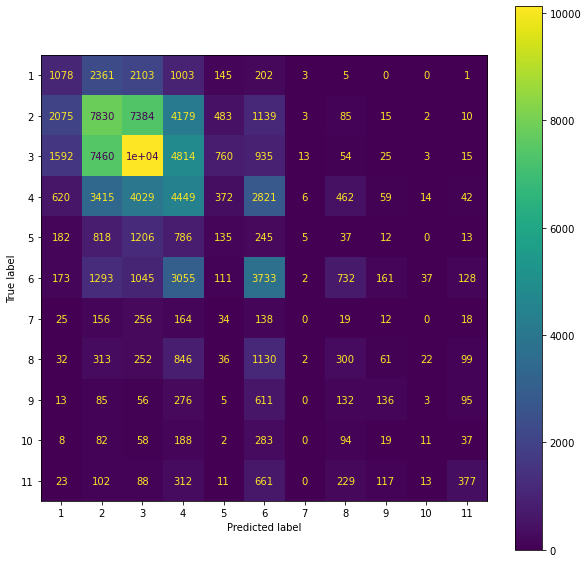

In [398]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ada_model_DT, X_test, y_test, ax=ax)

In [62]:
tuned_paramaters = {'n_estimators':np.arange(1,50)}  

from sklearn.model_selection import GridSearchCV

DT_AB_grid = GridSearchCV(ada_model_DT, tuned_paramaters, cv = kfold)        

DT_AB_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,
                                                                                random_state=10),
                                          random_state=10),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [63]:
DT_AB_grid.best_params_

{'n_estimators': 1}

In [399]:
ada_model_DT_tuned = AdaBoostClassifier(base_estimator=dt_tuned, n_estimators = 1, random_state = 10)

ada_model_DT_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,
                                                         random_state=10),
                   n_estimators=1, random_state=10)

In [400]:
y_pred_ada_model_DT_tuned = ada_model_DT.predict(X_test)
accuracy_score(y_test,y_pred_ada_model_DT_tuned)*100 

29.924153901718753

In [401]:
print(classification_report(y_test,y_pred_ada_model_DT_tuned))

              precision    recall  f1-score   support

           1       0.19      0.16      0.17      6901
           2       0.33      0.34      0.33     23205
           3       0.38      0.39      0.39     25792
           4       0.22      0.27      0.24     16289
           5       0.06      0.04      0.05      3439
           6       0.31      0.36      0.33     10470
           7       0.00      0.00      0.00       822
           8       0.14      0.10      0.11      3093
           9       0.22      0.10      0.13      1412
          10       0.10      0.01      0.02       782
          11       0.45      0.20      0.27      1933

    accuracy                           0.30     94138
   macro avg       0.22      0.18      0.19     94138
weighted avg       0.29      0.30      0.29     94138



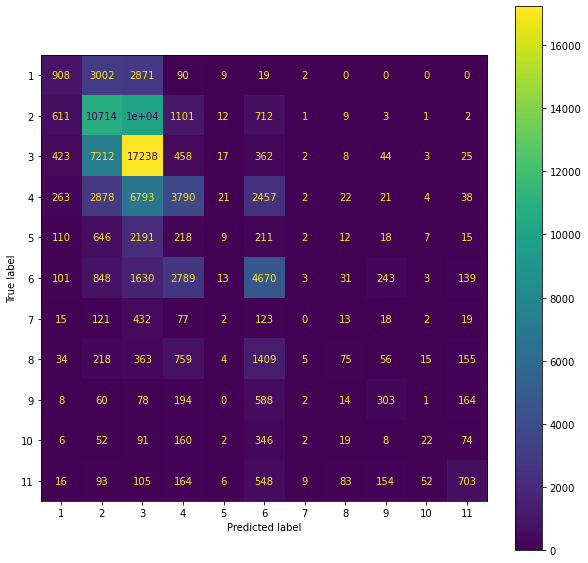

In [402]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ada_model_DT_tuned, X_test, y_test, ax=ax)

### ADA Boost - Random Forest

In [89]:
rf_classification_tuned = RandomForestClassifier(criterion = 'gini', n_estimators = 47, random_state = 10)

In [90]:
ada_model_rf = AdaBoostClassifier(base_estimator=rf_classification_tuned, n_estimators=1, random_state = 10)

ada_model_rf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=47,
                                                         random_state=10),
                   n_estimators=1, random_state=10)

In [91]:
y_pred_ada_model_RF = ada_model_rf.predict(X_test)
accuracy_score(y_test,y_pred_ada_model_RF)*100 

38.11850687288874

In [406]:
print(classification_report(y_test,y_pred_ada_model_RF))

              precision    recall  f1-score   support

           1       0.29      0.20      0.23      6901
           2       0.39      0.45      0.41     23205
           3       0.41      0.53      0.46     25792
           4       0.33      0.27      0.30     16289
           5       0.10      0.03      0.04      3439
           6       0.40      0.43      0.41     10470
           7       0.11      0.02      0.03       822
           8       0.26      0.10      0.15      3093
           9       0.39      0.24      0.29      1412
          10       0.23      0.05      0.09       782
          11       0.51      0.44      0.47      1933

    accuracy                           0.38     94138
   macro avg       0.31      0.25      0.26     94138
weighted avg       0.36      0.38      0.37     94138



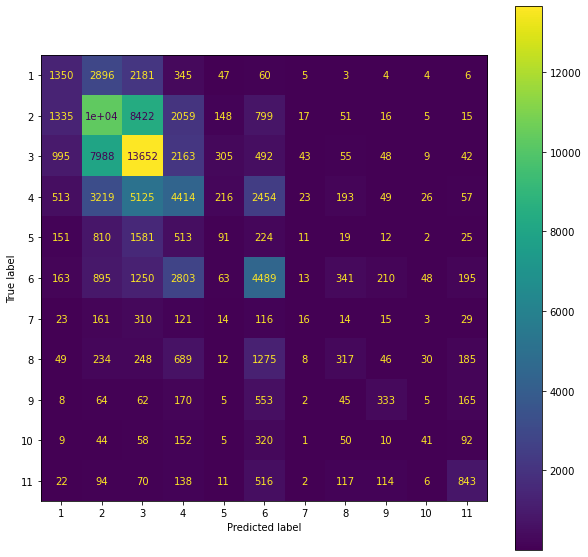

In [407]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ada_model_rf, X_test, y_test, ax=ax)

In [41]:
tuned_paramaters = {'n_estimators':np.arange(1,20)}  

from sklearn.model_selection import GridSearchCV

RF_AB_grid = GridSearchCV(ada_model_rf, tuned_paramaters, cv = kfold)        

RF_AB_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=47,
                                                                                random_state=10),
                                          n_estimators=1, random_state=10),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [92]:
ada_model_rf_tuned = AdaBoostClassifier(base_estimator=rf_classification_tuned, n_estimators = 4, random_state = 10)

ada_model_rf_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=47,
                                                         random_state=10),
                   n_estimators=4, random_state=10)

In [93]:
y_pred_ada_model_rf_tuned = ada_model_rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred_ada_model_rf_tuned)*100 

38.34901952452782

In [94]:
print(classification_report(y_test,y_pred_ada_model_rf_tuned))

              precision    recall  f1-score   support

           1       0.31      0.15      0.20      6901
           2       0.39      0.44      0.41     23205
           3       0.41      0.56      0.47     25792
           4       0.32      0.26      0.29     16289
           5       0.09      0.02      0.03      3439
           6       0.39      0.45      0.42     10470
           7       0.14      0.02      0.04       822
           8       0.30      0.09      0.14      3093
           9       0.43      0.17      0.24      1412
          10       0.26      0.05      0.09       782
          11       0.53      0.43      0.48      1933

    accuracy                           0.38     94138
   macro avg       0.33      0.24      0.26     94138
weighted avg       0.36      0.38      0.36     94138



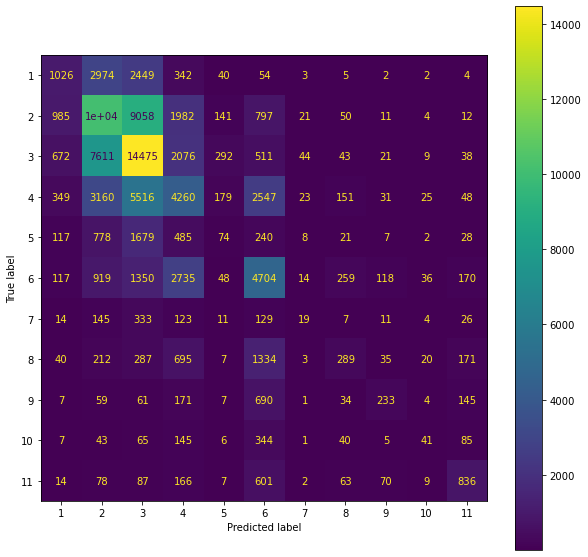

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ada_model_rf_tuned, X_test, y_test, ax=ax)

### Gradient boost

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=10)

In [97]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [98]:
y_pred_GB = GB.predict(X_test)
accuracy_score(y_test,y_pred_GB)*100 

41.5475153498056

In [99]:
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           1       0.41      0.12      0.19      6901
           2       0.42      0.51      0.46     23205
           3       0.42      0.66      0.52     25792
           4       0.41      0.17      0.24     16289
           5       0.14      0.00      0.00      3439
           6       0.39      0.53      0.45     10470
           7       0.00      0.00      0.00       822
           8       0.30      0.01      0.02      3093
           9       0.31      0.20      0.24      1412
          10       0.17      0.01      0.01       782
          11       0.52      0.40      0.45      1933

    accuracy                           0.42     94138
   macro avg       0.32      0.24      0.23     94138
weighted avg       0.39      0.42      0.37     94138



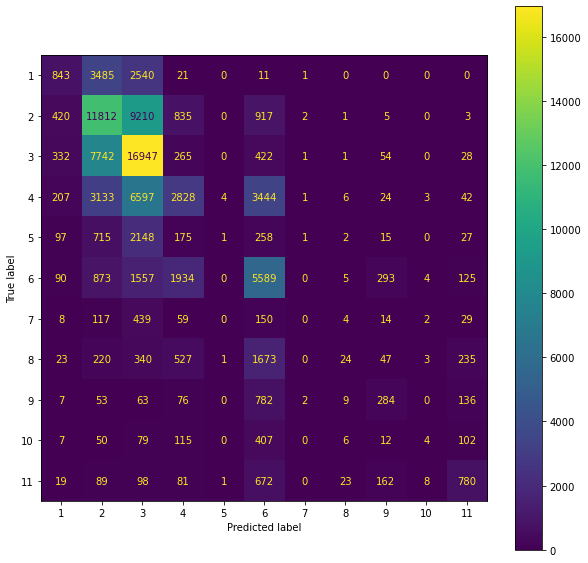

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB, X_test, y_test, ax=ax)

In [49]:
tuned_paramaters = {'n_estimators':np.arange(1,30)}  

from sklearn.model_selection import GridSearchCV

GB_grid = GridSearchCV(GB, tuned_paramaters, cv = kfold)        

GB_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [50]:
GB_grid.best_params_

{'n_estimators': 29}

In [101]:
GB_tuned=GradientBoostingClassifier(n_estimators=29, random_state=10)

In [102]:
GB_tuned.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=29, random_state=10)

In [103]:
y_pred_GB_tuned = GB_tuned.predict(X_test)
accuracy_score(y_test,y_pred_GB_tuned)*100 

40.07202192525866

In [104]:
print(classification_report(y_test,y_pred_GB_tuned))

              precision    recall  f1-score   support

           1       0.42      0.09      0.15      6901
           2       0.40      0.48      0.43     23205
           3       0.41      0.66      0.51     25792
           4       0.40      0.12      0.19     16289
           5       0.00      0.00      0.00      3439
           6       0.37      0.58      0.45     10470
           7       0.00      0.00      0.00       822
           8       0.33      0.00      0.01      3093
           9       0.30      0.21      0.24      1412
          10       0.00      0.00      0.00       782
          11       0.55      0.37      0.44      1933

    accuracy                           0.40     94138
   macro avg       0.29      0.23      0.22     94138
weighted avg       0.38      0.40      0.35     94138



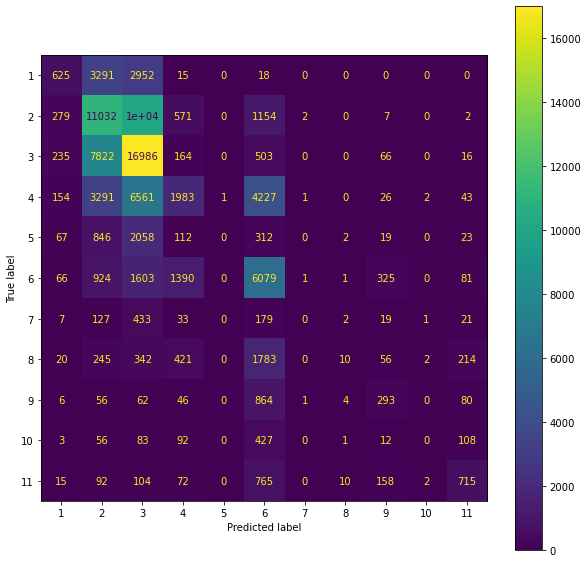

In [105]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GB_tuned, X_test, y_test, ax=ax)

### Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [107]:
NB.fit(X_train,y_train)

GaussianNB()

In [108]:
y_pred_NB = NB.predict(X_test)
accuracy_score(y_test,y_pred_NB)*100 

36.494295608574646

In [109]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       0.31      0.11      0.17      6901
           2       0.36      0.41      0.38     23205
           3       0.39      0.65      0.49     25792
           4       0.32      0.15      0.21     16289
           5       0.07      0.01      0.01      3439
           6       0.33      0.38      0.35     10470
           7       0.00      0.00      0.00       822
           8       0.09      0.01      0.01      3093
           9       0.09      0.02      0.03      1412
          10       0.50      0.00      0.00       782
          11       0.43      0.37      0.39      1933

    accuracy                           0.36     94138
   macro avg       0.26      0.19      0.19     94138
weighted avg       0.33      0.36      0.33     94138



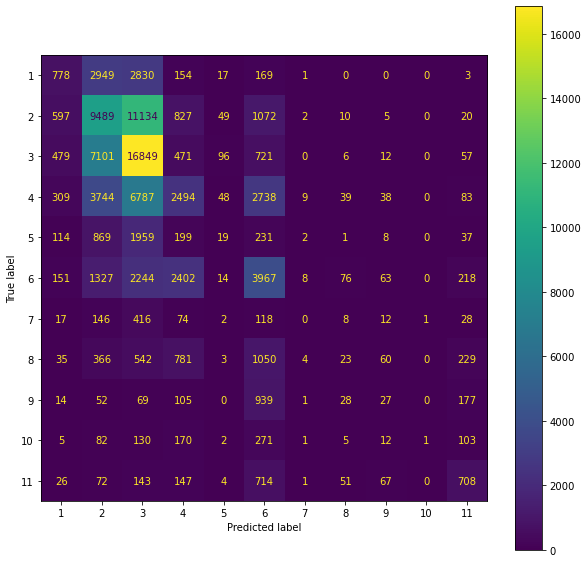

In [110]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(NB, X_test, y_test, ax=ax)

### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=565,weights='distance')  

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=565, weights='distance')

In [90]:
y_pred_KNN = knn.predict(X_test)
accuracy_score(y_test,y_pred_KNN)*100 

34.24334487667042

In [92]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           1       0.25      0.00      0.01      6901
           2       0.37      0.40      0.38     23205
           3       0.33      0.77      0.46     25792
           4       0.32      0.09      0.13     16289
           5       0.17      0.00      0.00      3439
           6       0.31      0.15      0.21     10470
           7       0.00      0.00      0.00       822
           8       0.52      0.00      0.01      3093
           9       0.40      0.00      0.00      1412
          10       0.67      0.00      0.01       782
          11       0.80      0.11      0.20      1933

    accuracy                           0.34     94138
   macro avg       0.38      0.14      0.13     94138
weighted avg       0.34      0.34      0.27     94138



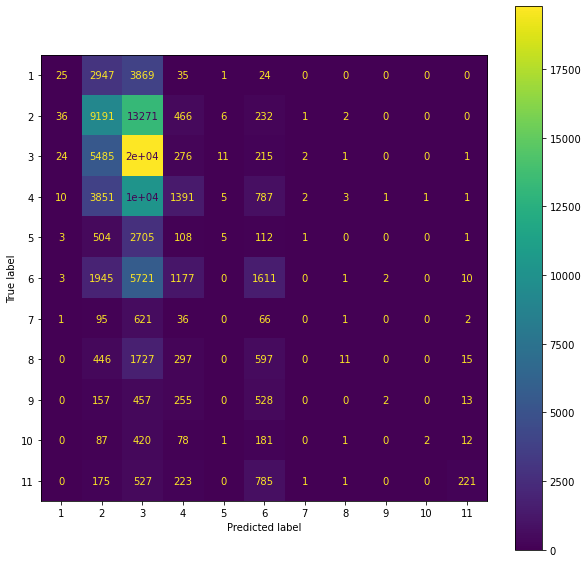

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, X_test, y_test, ax=ax)

### CATBoost

In [183]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(random_state=10,use_best_model=True,iterations=1000)
cb.fit(X_train,y_train,use_best_model=True,verbose=100,eval_set=(X_test,y_test))

Learning rate set to 0.120271
0:	learn: 2.1972797	test: 2.1978440	best: 2.1978440 (0)	total: 540ms	remaining: 8m 59s
100:	learn: 1.5115382	test: 1.5242638	best: 1.5242638 (100)	total: 43.7s	remaining: 6m 29s
200:	learn: 1.4818453	test: 1.5070444	best: 1.5070444 (200)	total: 1m 30s	remaining: 5m 58s
300:	learn: 1.4638516	test: 1.5016071	best: 1.5016071 (300)	total: 2m 10s	remaining: 5m 3s
400:	learn: 1.4484799	test: 1.4983697	best: 1.4983697 (400)	total: 2m 57s	remaining: 4m 25s
500:	learn: 1.4345747	test: 1.4970449	best: 1.4970449 (500)	total: 3m 49s	remaining: 3m 49s
600:	learn: 1.4237650	test: 1.4965192	best: 1.4964737 (579)	total: 4m 43s	remaining: 3m 8s
700:	learn: 1.4123374	test: 1.4963260	best: 1.4961744 (652)	total: 5m 34s	remaining: 2m 22s
800:	learn: 1.4018164	test: 1.4964416	best: 1.4961744 (652)	total: 6m 25s	remaining: 1m 35s
900:	learn: 1.3915056	test: 1.4967396	best: 1.4961744 (652)	total: 7m 12s	remaining: 47.5s
999:	learn: 1.3815565	test: 1.4971529	best: 1.4961744 (652)

In [184]:
cb_pred = cb.predict(X_test)
accuracy_score(y_test,cb_pred)*100 

42.54180033567741

In [185]:
print(classification_report(y_test,cb_pred))

              precision    recall  f1-score   support

           1       0.41      0.16      0.23      6901
           2       0.43      0.51      0.47     23205
           3       0.43      0.66      0.52     25792
           4       0.41      0.24      0.30     16289
           5       0.24      0.00      0.01      3439
           6       0.41      0.48      0.44     10470
           7       0.12      0.00      0.00       822
           8       0.42      0.03      0.05      3093
           9       0.36      0.21      0.27      1412
          10       0.29      0.01      0.02       782
          11       0.52      0.43      0.47      1933

    accuracy                           0.43     94138
   macro avg       0.37      0.25      0.25     94138
weighted avg       0.41      0.43      0.39     94138



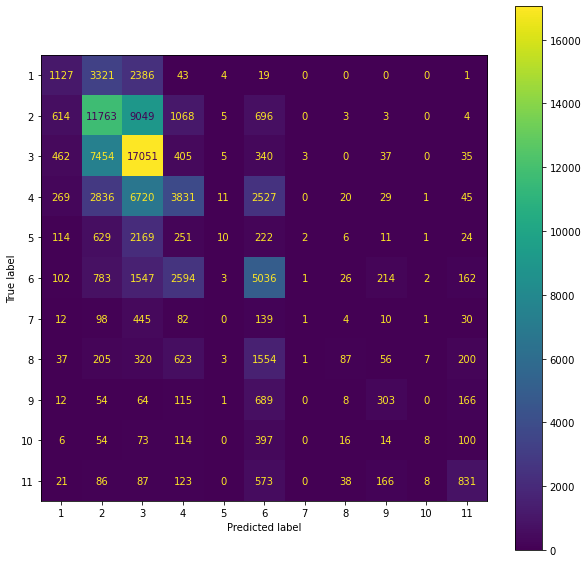

In [186]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cb, X_test, y_test, ax=ax)

### Submission

In [216]:
ls  =  df_full_test.columns.tolist()

in_data  =  df_full_test[ls]

out_data =  cb.predict (in_data)

In [217]:
test = pd.read_csv('test_data.csv')
submit =  pd.DataFrame()

In [218]:
submit ['case_id']  =  test['case_id']
submit ['Stay']     =  out_data

stay_decode         =  {  1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70',8 : '71-80', 9 : '81-90', 
                         10 : '91-100', 11 : 'More than 100 Days' }

submit ['Stay']     =  submit ['Stay'].map(stay_decode)

submit.head(15)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
5,318444,21-30
6,318445,21-30
7,318446,21-30
8,318447,21-30
9,318448,21-30


In [225]:
count = submit ['Stay'].value_counts()
count

21-30                 85076
51-60                 23685
11-20                 12285
31-40                  6693
0-10                   5242
More than 100 Days     2407
81-90                  1329
71-80                   174
41-50                   127
91-100                   32
61-70                     7
Name: Stay, dtype: int64

<AxesSubplot:>

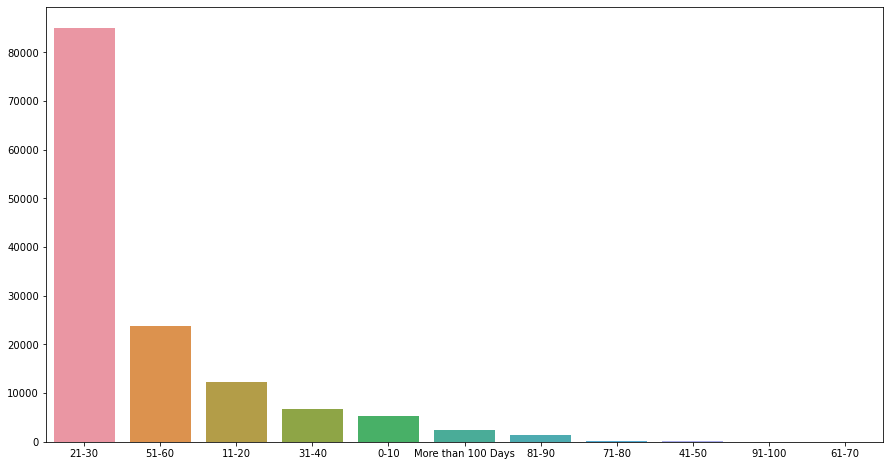

In [226]:
sns.barplot(x=count.index.values, y=count.values,data=submit)